In [1]:
%load_ext autoreload
%autoreload 2
from analysis_lib import *

# Prosite vs csearch vs IBF vs HIBF

In [2]:
sprot_df = pd.read_csv("/Users/rschwab/repos/tetrex_analysis/data/RESULTS/all_sprot_times.tsv", sep="\t")

## Speed Up Calculations for Amino Acids

In [ ]:
sprot_df['PROSITE'].mean()/sprot_df['TETREX'].mean()

246.32060820384768

In [ ]:
sprot_df['EGREP'].mean()/sprot_df['TETREX'].mean()

239.17198073285357

In [ ]:
sprot_df['CSEARCH'].mean()/sprot_df['TETREX'].mean()

10.333761529023743

In [ ]:
sprot_df['RIPGREP'].mean()/sprot_df['TETREX'].mean()

6.934944544093992

## Runtime Plots

In [3]:
sprot_melt = pd.melt(sprot_df, id_vars=["ID"], value_vars=["PROSITE","EGREP","CSEARCH", "RIPGREP", "TETREX"])
sprot_melt.columns = ["RegEx ID", "Tool", "Runtime (s)"]

In [5]:
sprot_melt["GB/s"] = 1/sprot_melt["Runtime (s)"]

<Axes: xlabel='Tool'>

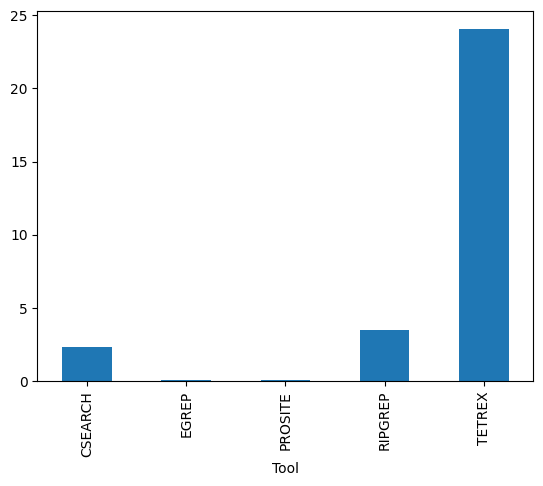

In [12]:
sprot_melt.groupby("Tool")['GB/s'].apply(stats.hmean).plot.bar()

<Axes: xlabel='Tool', ylabel='Runtime (s)'>

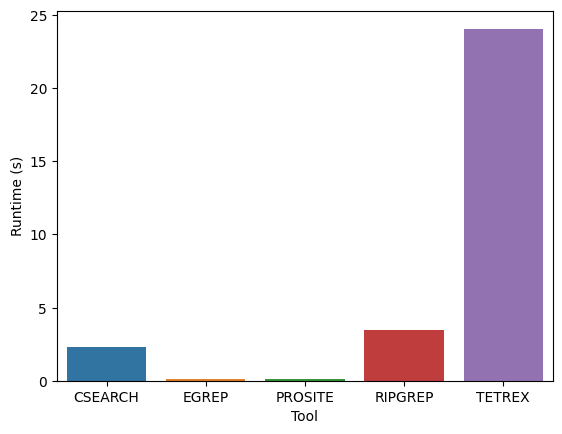

In [22]:
reciprocal_means = pd.DataFrame(1/sprot_melt.groupby("Tool")["Runtime (s)"].mean()).reset_index()
sns.barplot(reciprocal_means, x="Tool", y="Runtime (s)")

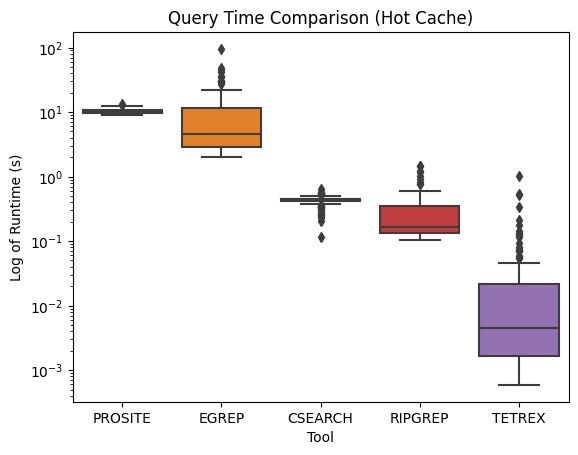

In [34]:
bplt = sns.boxplot(sprot_melt, x="Tool", y="Runtime (s)")
bplt.set_title("Query Time Comparison (Hot Cache)")
bplt.set_ylabel("Log of Runtime (s)")
plt.yscale('log')

# Bin Analysis (For Real This Time)

Text(0, 0.5, 'Bin Count')

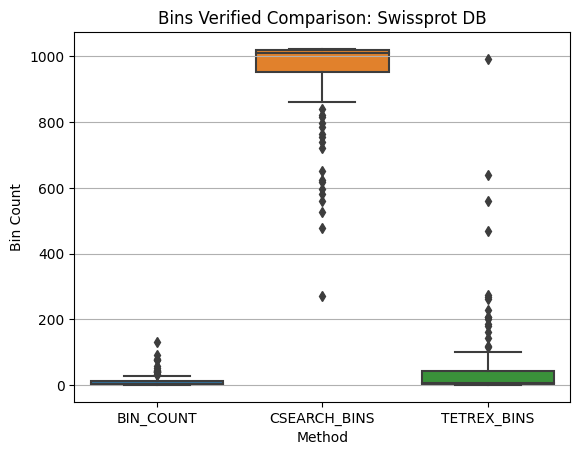

In [8]:
fig, axes = plt.subplots()
sns.boxplot(data=sprot_df[['BIN_COUNT','CSEARCH_BINS','TETREX_BINS']], ax = axes)
axes.set_title('Bins Verified Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('Bin Count')

In [10]:
sprot_df['CSEARCH_REDUCTION'] = pd.Series([((1024-pred)/1024)*100 for pred in sprot_df['CSEARCH_BINS']])
sprot_df['TETREX_REDUCTION'] = pd.Series([((1024-pred)/1024)*100 for pred in sprot_df['TETREX_BINS']])

<bound method Figure.get_figwidth of <Figure size 640x480 with 1 Axes>>

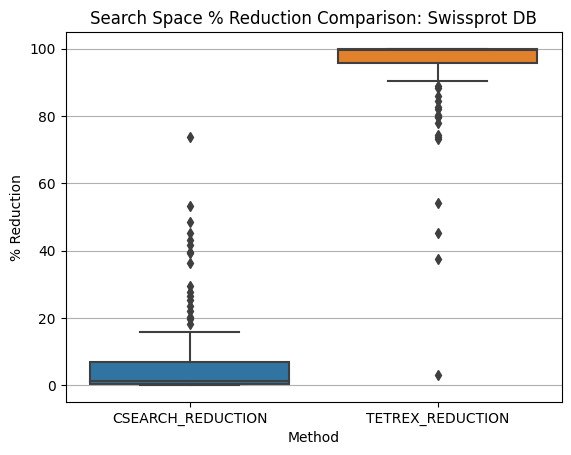

In [11]:
fig, axes = plt.subplots()
sns.boxplot(data=sprot_df[['CSEARCH_REDUCTION','TETREX_REDUCTION']], ax = axes)
axes.set_title('Search Space % Reduction Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('% Reduction')
fig.get_figwidth

In [14]:
sprot_df['CSEARCH FRACTION'] = pd.Series([((pred)/1024)*100 for pred in sprot_df['CSEARCH_BINS']])
sprot_df['TETREX FRACTION'] = pd.Series([((pred)/1024)*100 for pred in sprot_df['TETREX_BINS']])

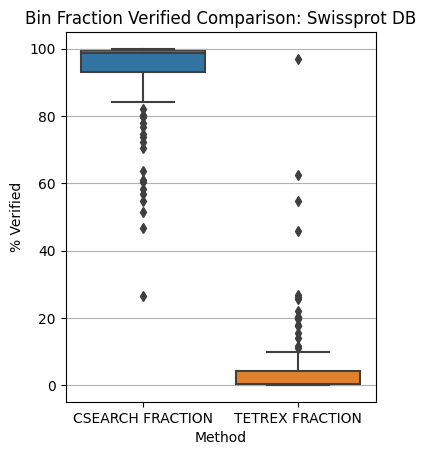

In [16]:
fig, axes = plt.subplots()
sns.boxplot(data=sprot_df[['CSEARCH FRACTION','TETREX FRACTION']], ax = axes)
axes.set_title('Bin Fraction Verified Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('% Verified')
fig.set_figwidth(4)

[(0.0, 100.0)]

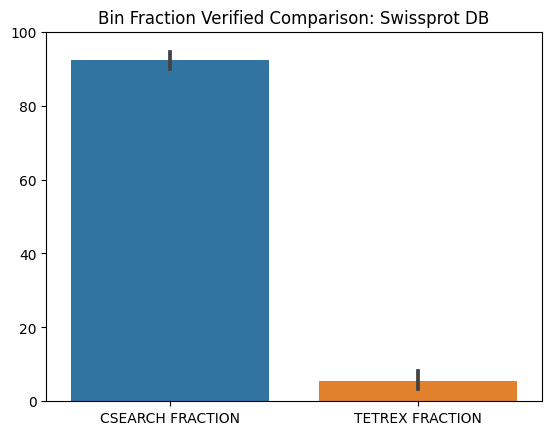

In [ ]:
fig, axes = plt.subplots()
sns.barplot(data=sprot_df[['CSEARCH FRACTION','TETREX FRACTION']])
axes.set_title('Average Bin Fraction Verified Comparison: Swissprot DB')
axes.set(ylim=(0, 100))
# axes.yaxis.grid(True)

# One to One Runtime Comparisons

In [8]:
sprot_df[sprot_df["TETREX"].ge(sprot_df["RIPGREP"])]

,NAME,ID,PATTERN,GROUP_COUNT,REGEX,PROSITE,CSEARCH,TETREX_IBF,TETREX,EGREP,BIN_COUNT,CSEARCH_BINS,TETREX_BINS,CSEARCH_FP,TETREX_FP,RIPGREP
25,IG_MHC,PS00290,[FY]-{L}-C-{PGAD}-[VA]-{LC}-H,6,(F|Y)(M|I|F|H|E|P|R|C|V|W|G|K|T|S|D|Y|N|A|Q)C(...,9.524,0.44957,0.131679,1.0346,14.986,92,1023,992,931,900,0.409


In [9]:
sprot_df[sprot_df["TETREX"].ge(sprot_df["CSEARCH"])]

,NAME,ID,PATTERN,GROUP_COUNT,REGEX,PROSITE,CSEARCH,TETREX_IBF,TETREX,EGREP,BIN_COUNT,CSEARCH_BINS,TETREX_BINS,CSEARCH_FP,TETREX_FP,RIPGREP
13,ZINC_PROTEASE,PS00142,[GSTALIVN]-{PCHR}-{KND}-H-E-[LIVMFYW]-{DEHRKP}...,9,(G|S|T|A|L|I|V|N)(K|Q|W|Y|N|T|S|E|L|G|M|V|A|D|...,13.122,0.470350,0.078933,0.531609,95.170,28,1023,275,995,247,1.162
25,IG_MHC,PS00290,[FY]-{L}-C-{PGAD}-[VA]-{LC}-H,6,(F|Y)(M|I|F|H|E|P|R|C|V|W|G|K|T|S|D|Y|N|A|Q)C(...,9.524,0.449570,0.131679,1.034600,14.986,92,1023,992,931,900,0.409
28,LECTIN_LEGUME_ALPHA,PS00308,[LIV]-{LA}-[EDQ]-[FYWKR]-V-{VF}-[LIVF]-G-[LF]-...,9,(L|I|V)(D|W|M|F|I|Y|V|C|T|R|K|G|S|E|N|Q|H|P)(E...,11.615,0.451597,0.202688,0.510175,27.390,13,1023,30,1010,17,0.838
